# Multi-Class Prediction of Obesity Risk
Run after following notebooks are run:
1. **01 Data Cleaning**

## Development Notes


In [3]:
## set up libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats # Used for Cramer's V computation

## Load Data

In [5]:
train = pd.read_pickle('train_clean.pkl')

## Univariate (One-way) Analysis

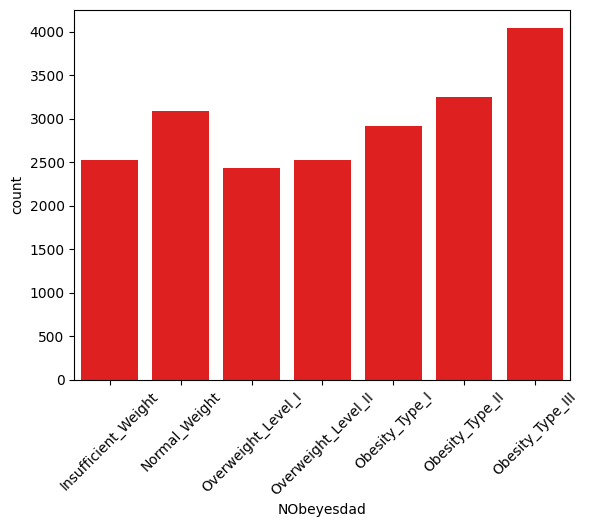

In [10]:
## distribution of obesity
g=sns.countplot(data=train, x='NObeyesdad', color='red')
plt.xticks(rotation=45)
None

### Categorical Variables